# CNN - introduction

In this tutorial we learn how the convolutional networks work and are used in image classification.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

## Convolution for border detection

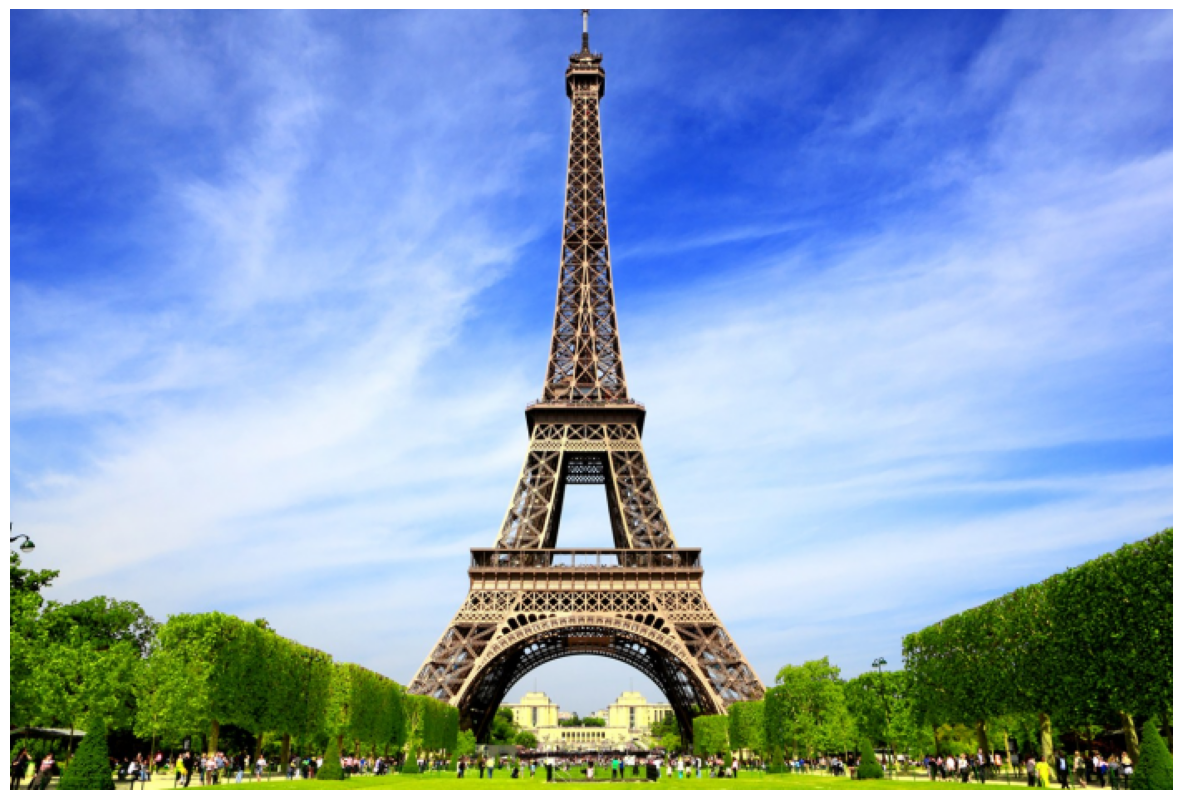

Image shape: (470, 700, 3)


In [4]:
# load eifel image
img = mpimg.imread('eifel.jpg')

# keep RGB channels
img = img[:,:,:3]

fig = plt.figure(figsize=(15,12))
plt.imshow(img)
plt.axis('off')
plt.show()

print('Image shape: {}'.format(img.shape))

In [7]:
img

array([[[0.1882353 , 0.31764707, 0.72156864],
        [0.19607843, 0.3254902 , 0.7294118 ],
        [0.2       , 0.32941177, 0.7411765 ],
        ...,
        [0.50980395, 0.6117647 , 0.9019608 ],
        [0.5176471 , 0.6156863 , 0.9019608 ],
        [0.5372549 , 0.6313726 , 0.9137255 ]],

       [[0.19215687, 0.32156864, 0.7254902 ],
        [0.19607843, 0.3254902 , 0.7294118 ],
        [0.19215687, 0.32156864, 0.73333335],
        ...,
        [0.5294118 , 0.627451  , 0.91764706],
        [0.5372549 , 0.6313726 , 0.9137255 ],
        [0.54509807, 0.6392157 , 0.92156863]],

       [[0.1882353 , 0.31764707, 0.7254902 ],
        [0.1882353 , 0.31764707, 0.7294118 ],
        [0.19215687, 0.32156864, 0.73333335],
        ...,
        [0.5411765 , 0.6392157 , 0.92156863],
        [0.54901963, 0.6431373 , 0.92156863],
        [0.5529412 , 0.64705884, 0.92156863]],

       ...,

       [[0.10196079, 0.07058824, 0.03529412],
        [0.02352941, 0.00784314, 0.        ],
        [0.2509804 , 0

In [ ]:
img.shape

In [9]:
# convert to grayscale
# those are the exact numbers
def rgb_to_grayscale(red, green, blue):
    return (0.3*red + 0.59*green + 0.11*blue)

# use a preprogrammed fucntion from tensorflow
img_gray = tf.image.rgb_to_grayscale(img)

# remove the last dimension and convert to numpy
img_gray = np.array(tf.squeeze(img_gray))

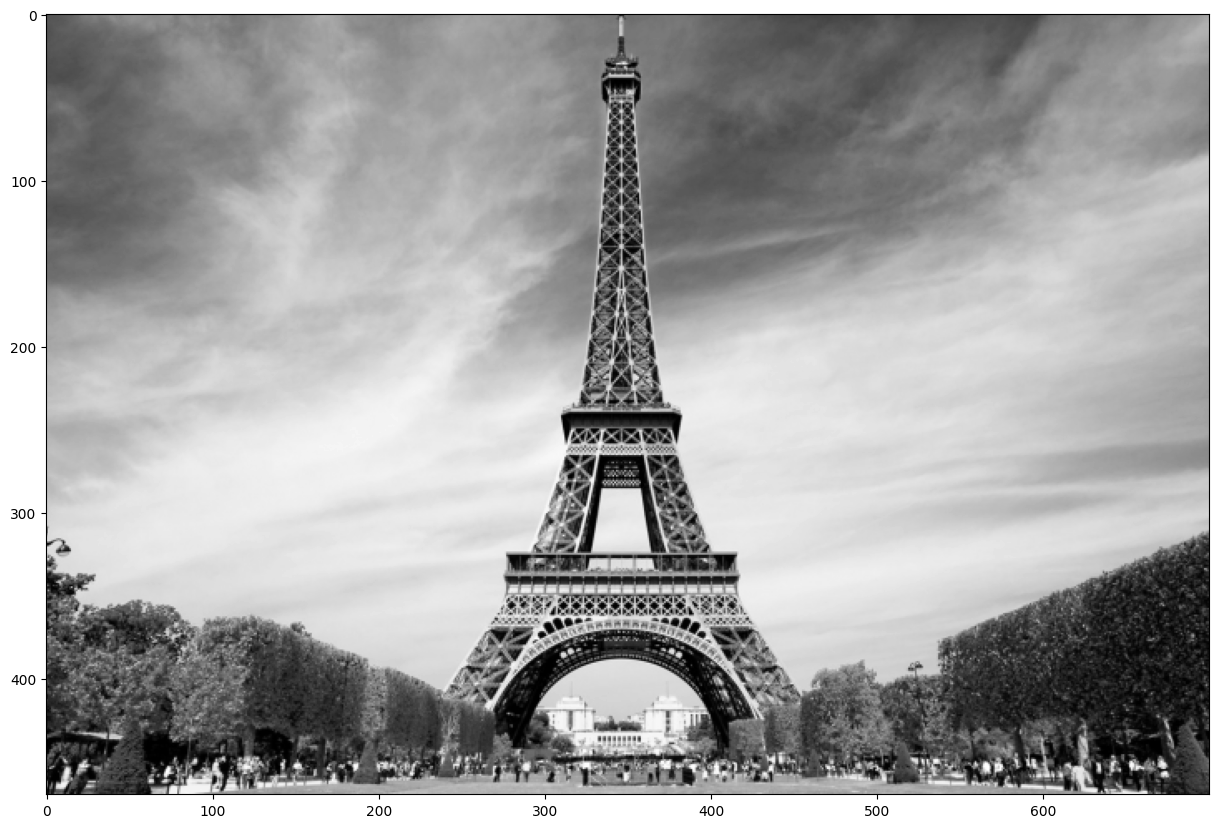

In [10]:
fig = plt.figure(figsize=(15,12))
plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
def detect_borders(img, mask, threshold=0.001):
    mask_size = len(mask) #kernel
    img_processed = np.zeros((img_gray.shape[0] - mask_size + 1, img_gray.shape[1] - mask_size + 1))
    
    # Apply convolution
    for row in range(img.shape[0] - mask_size + 1):
        for col in range(img.shape[1] - mask_size + 1):
            img_section = img_gray[row:row+mask_size, col:col+mask_size]
            img_processed[row, col] = sum(sum((img_section * mask)))
    
    
    fig = plt.figure(figsize=(15,12))
    plt.imshow(img_processed, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()
    
    img_processed = 1 - (img_processed > threshold).astype(int)            
    fig = plt.figure(figsize=(15,12))
    plt.imshow(img_processed, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

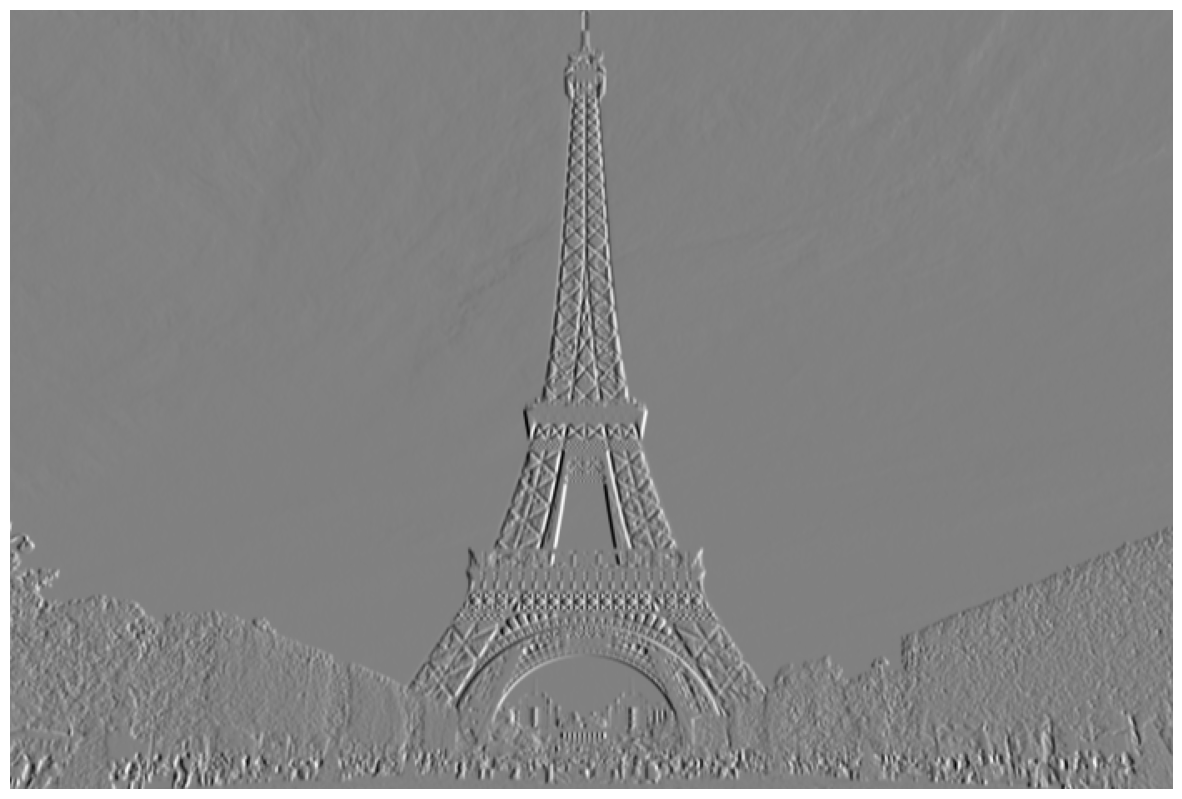

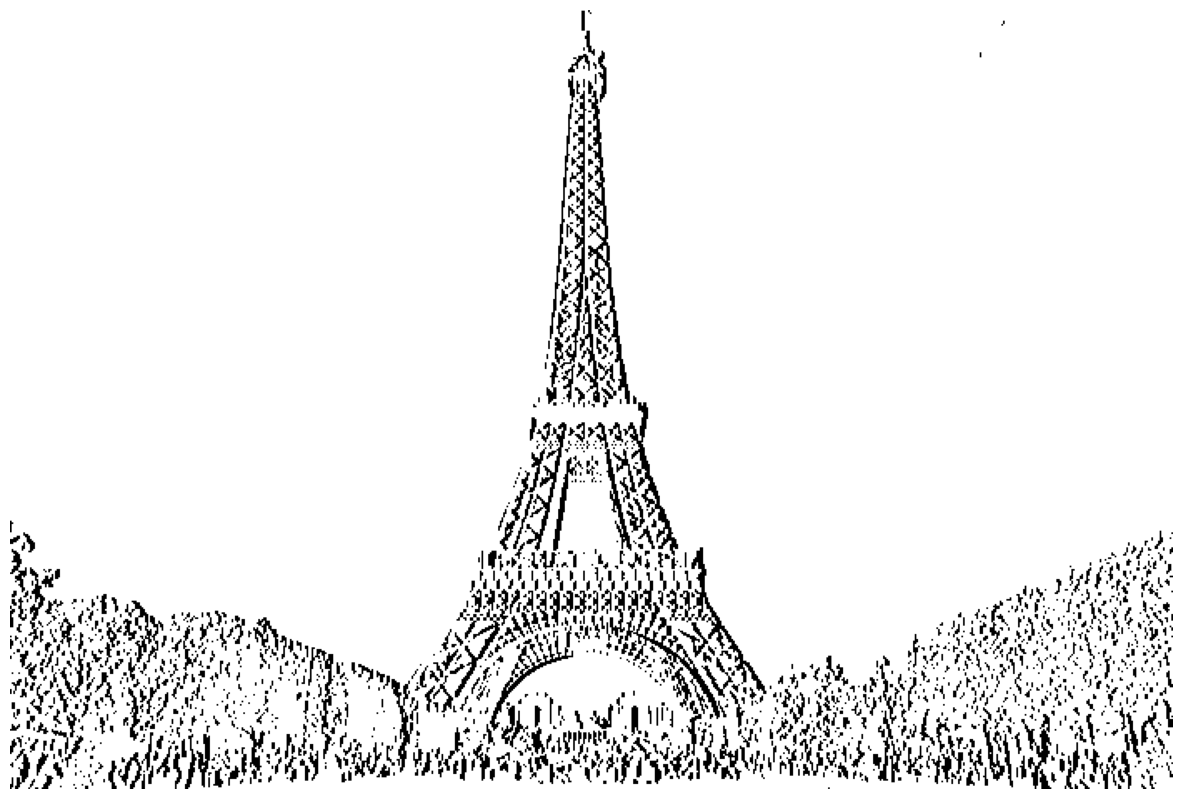

In [13]:
# Identify vertical borders
mask = [
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
]

detect_borders(img, mask, threshold=0.25)

This mask is a 3x3 convolution kernel commonly used for edge detection. Each element in the mask represents the weight assigned to the corresponding pixel in the neighborhood of the target pixel during the convolution operation.

Here's how you can understand the mask:
- The center pixel of the mask (0 in this case) corresponds to the target pixel being processed.
- The surrounding pixels in the mask represent neighboring pixels relative to the target pixel.
- Positive and negative numbers in the mask represent the directional gradients in the image.
- In this specific mask:
  - The top row represents a horizontal gradient filter. 
  - The middle row is neutral and acts as a placeholder.
  - The bottom row represents the opposite of the top row, capturing the horizontal gradient in the opposite direction.

When this mask is applied during convolution:
- Positive numbers (e.g., 1 and 2) amplify the pixel intensity differences in the direction of the gradient.
- Negative numbers (e.g., -1 and -2) amplify the pixel intensity differences in the opposite direction of the gradient.

By convolving this mask with an image, you're effectively detecting edges by emphasizing horizontal gradients. Positive values in the mask enhance edges with increasing pixel intensity in the direction of the gradient, while negative values enhance edges with decreasing pixel intensity. The magnitude of the weights determines the strength of the edge response.

In [ ]:
# Identify horizontal borders
mask = [
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
]

detect_borders(img, np.transpose(mask), threshold=0.25)

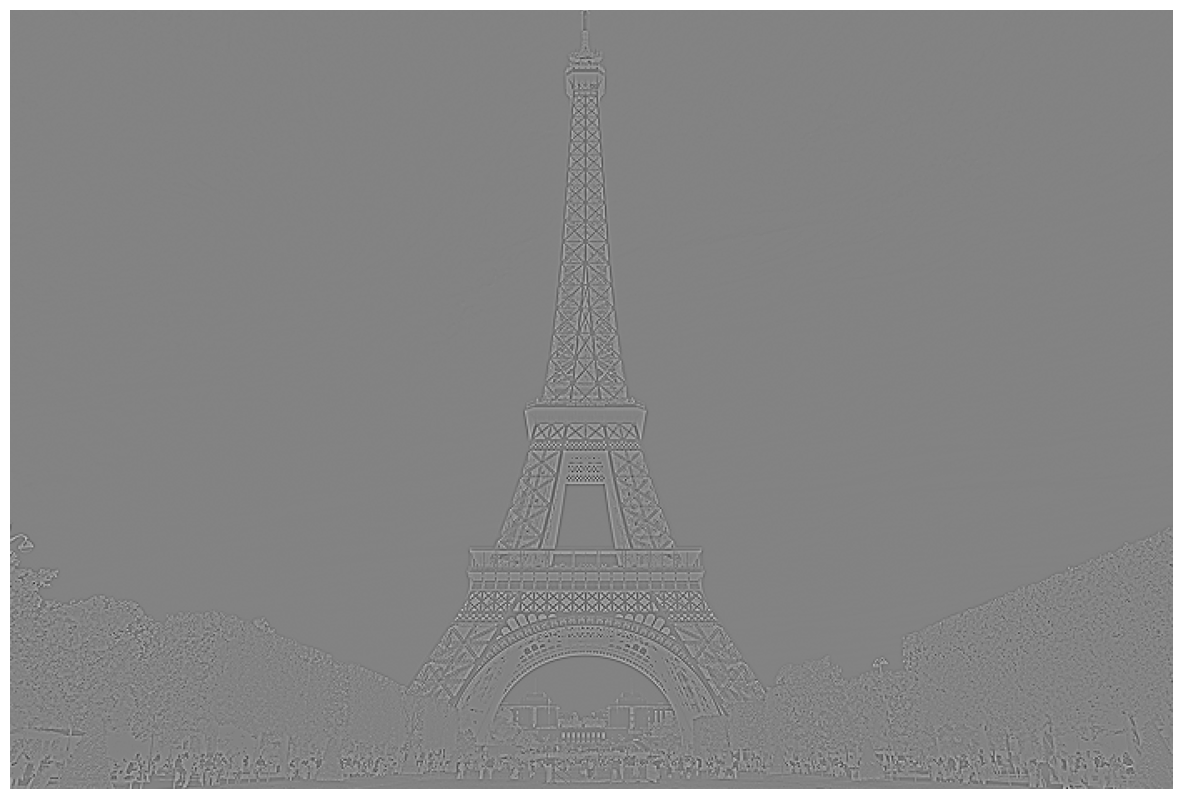

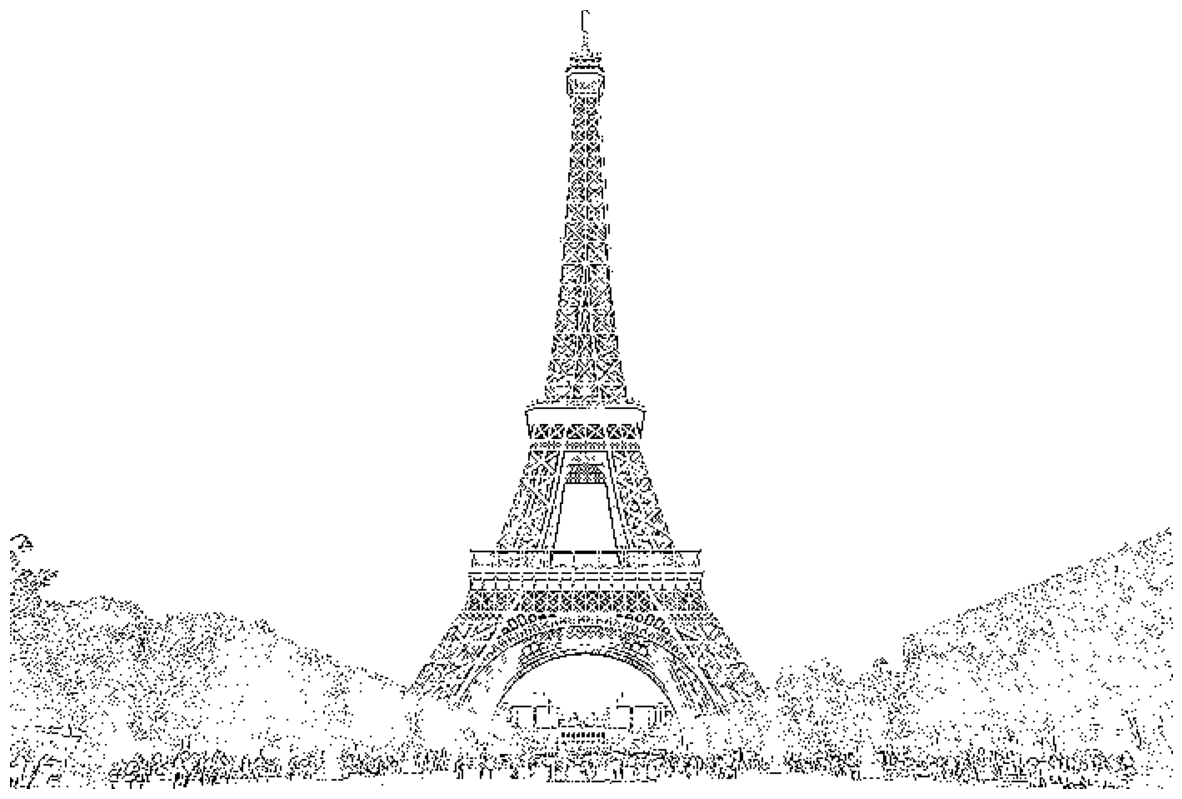

In [14]:
# Laplace edge detector, should do both horizontal and vertical

mask = [
    [0,  1,  0],
    [1,  -4, 1],
    [0,  1,  0]
]

detect_borders(img, np.transpose(mask), threshold=0.25)

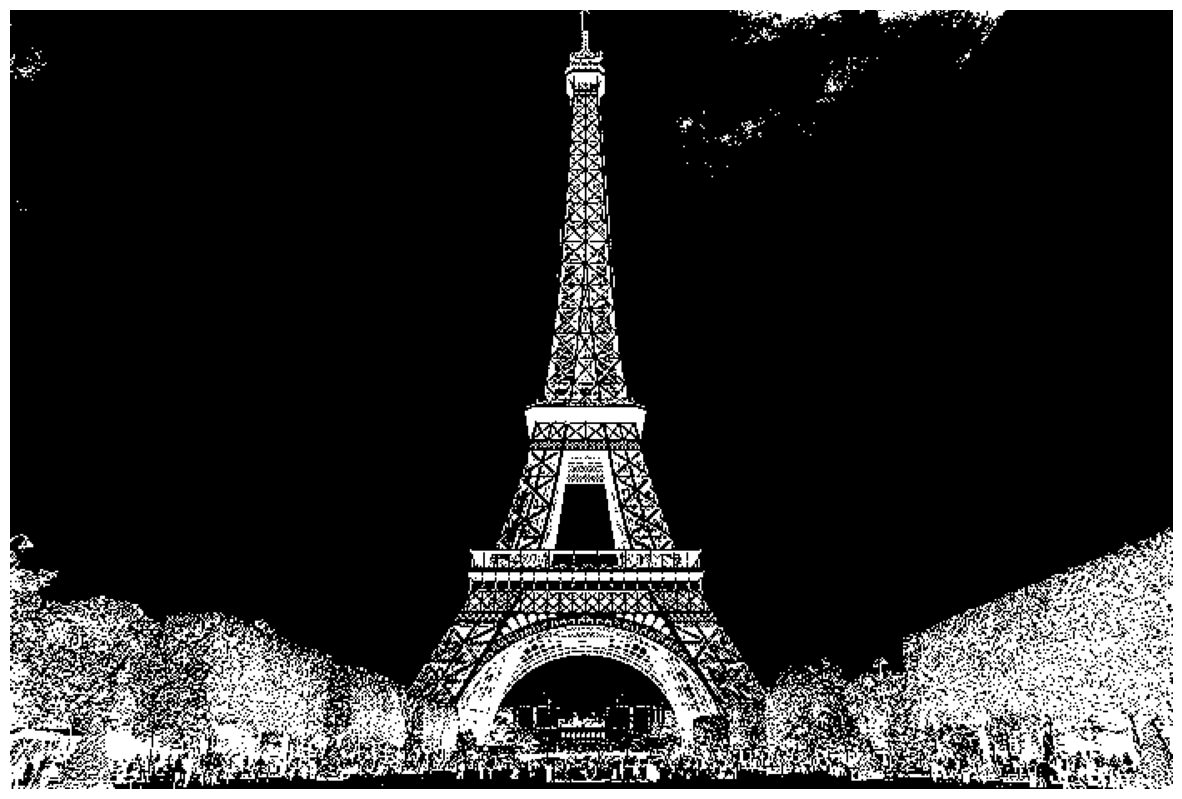

In [15]:
# now with negative sign
mask = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

detect_borders(img, mask, threshold=0.3)

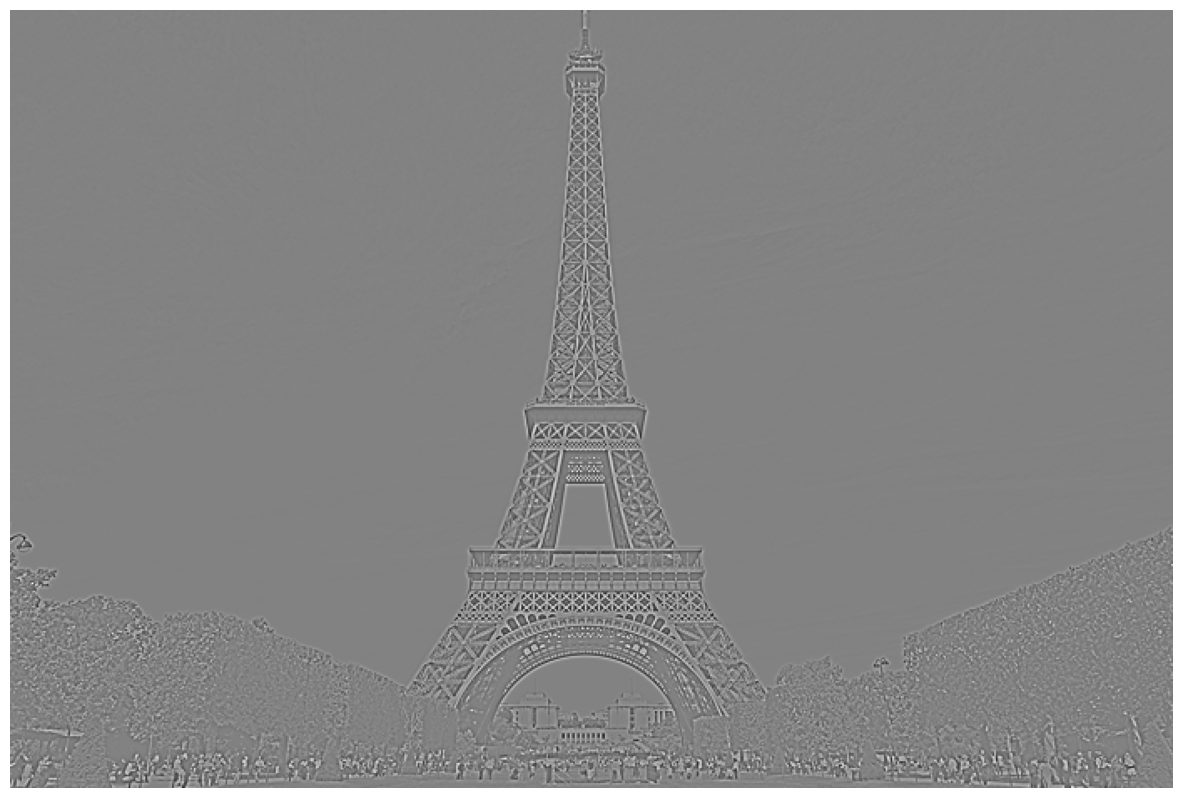

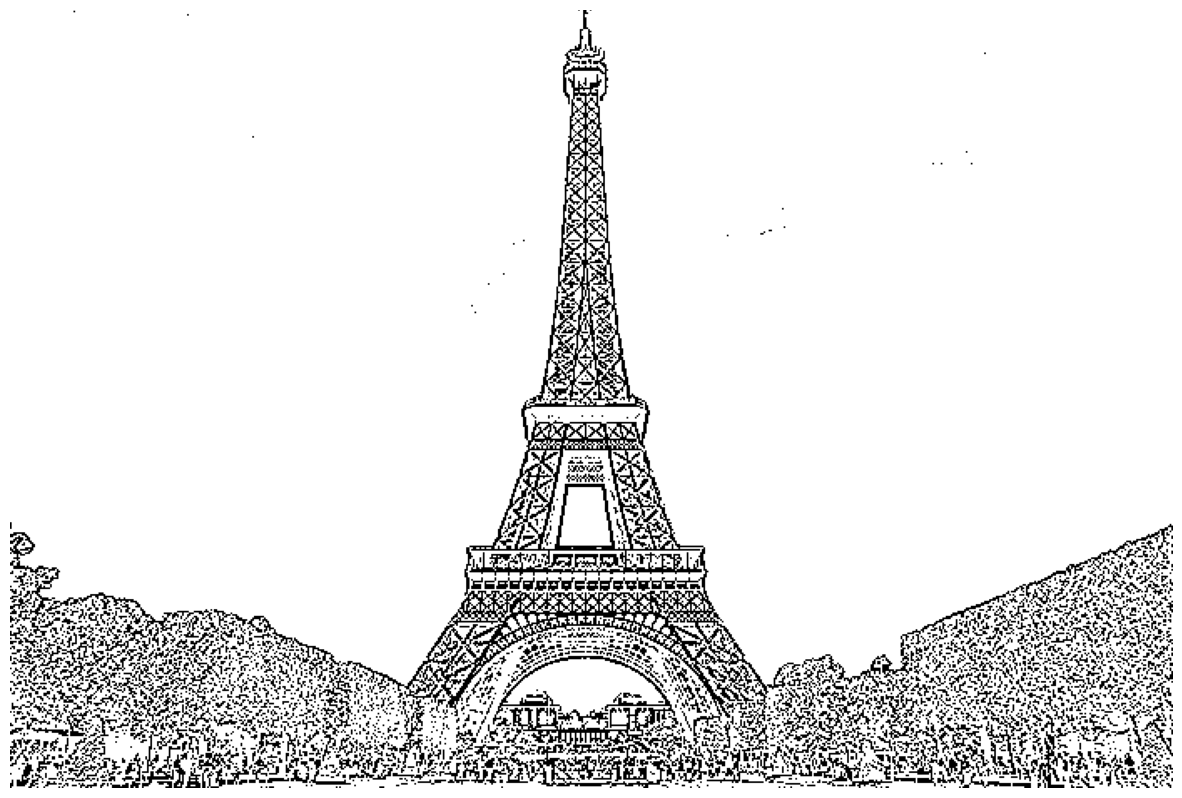

In [16]:
# Identify changes around a point
mask = [
    [0,   0,  -1,   0,   0],
    [0,  -1,  -2,  -1,   0],
    [-1, -2,  16,  -2,  -1],
    [0,  -1,  -2,  -1,   0],
    [0,   0,  -1,   0,   0]
]

detect_borders(img, mask, threshold=0.3)

In [ ]:

mask = [
    [1,   2,  1,],
    [2,   4,  2,] ,
    [1,   2,  1,]  
]

detect_borders(img, mask, threshold=0.3)

<span style="color:green">**TO DO:** Try you own masks e.g. for sharpening an image, bluring it etc.</span>


https://en.wikipedia.org/wiki/Kernel_(image_processing)

## Images and processing

Tensoflow contains several datasets for image classification
 - https://www.tensorflow.org/datasets/catalog/overview
 
Useful guide for image processing:
 - https://www.tensorflow.org/tutorials/images/data_augmentation
 
We have two options:
 1. Use keras processing layers - make them as a part of the network
 2. Apply transformation on tf.data.Dataset using .map()

### Check some datasets

In [17]:
# can be used to supress the progress bar
# tfds.disable_progress_bar()

# Load the cat vs dogs data
cats_vs_dogs = tfds.load(
    "cats_vs_dogs",
    split="train",
    as_supervised=True, # Include labels
    shuffle_files=False # Change to true for training
)

In [18]:
cats_vs_dogs

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Documentation for the Tensorflow Dataset
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset

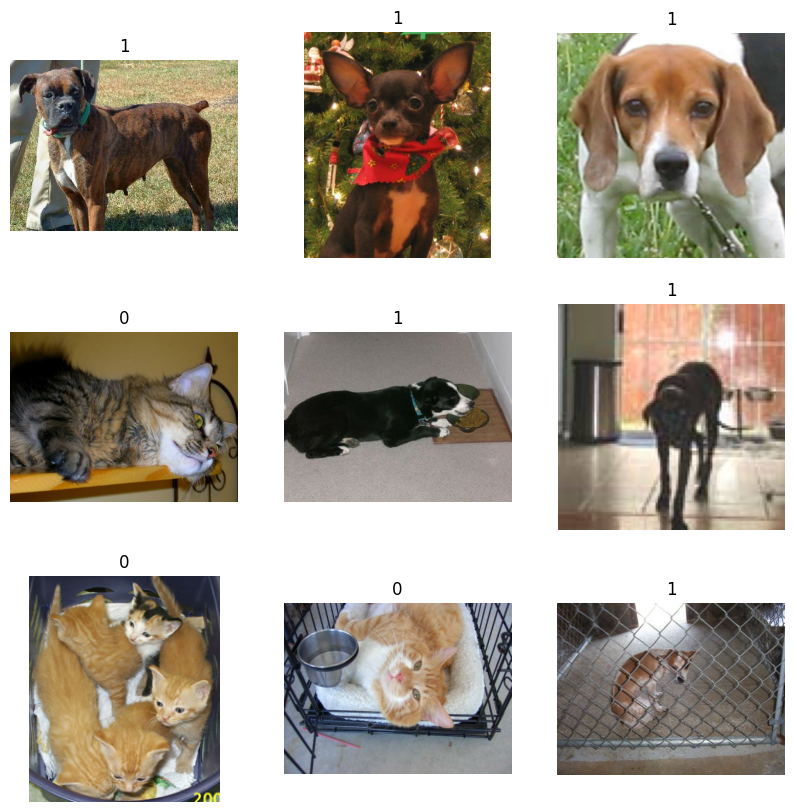

In [19]:
# Plot it
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(cats_vs_dogs.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(int(label))
    plt.axis('off')
    plt.plot()

In [20]:
# Load the mnist data
mnist_train, mnist_dev = tfds.load(
    "mnist",
    split=["train", "test"],
    as_supervised=True, # Include labels
    shuffle_files=False # Change to true for training
)

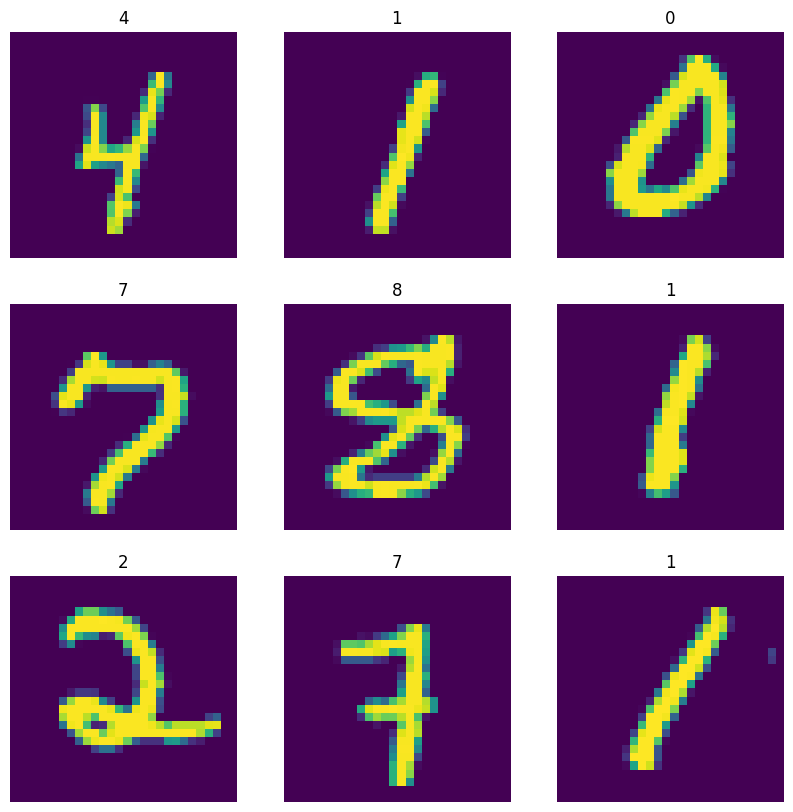

In [21]:
# Plot it
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(mnist_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(int(label))
    plt.axis('off')
    plt.plot()

### Image processing

Certainly! Here are some key aspects to consider when preprocessing images for convolutional neural networks (CNNs):

1. **Resizing**: CNNs typically require fixed-size inputs, so resizing images to a consistent size is often necessary. This ensures uniformity in input dimensions across the dataset.

2. **Normalization**: Scaling pixel values to a consistent range, such as [0, 1] or [-1, 1], can improve convergence during training and make optimization more stable.

3. **Data Augmentation**: Introducing variations in the training data, such as rotation, flipping, cropping, and brightness adjustments, can help improve model generalization and robustness.

4. **Color Space**: Depending on the task, converting images to different color spaces (e.g., grayscale, RGB, HSV) might be beneficial. Grayscale images reduce complexity and computational cost, while retaining essential features for certain tasks.

5. **Noise Reduction**: Applying filters or denoising techniques can help remove unwanted noise from images, improving the signal-to-noise ratio and enhancing feature extraction.

6. **Normalization**: Normalizing the image data can help balance the contribution of different channels and improve convergence during training.

7. **Pretrained Models and Transfer Learning**: Leveraging pretrained CNN models trained on large datasets (e.g., ImageNet) can be effective, especially when the task is similar. Fine-tuning these models on the target dataset often requires minimal effort and computational resources.

8. **Data Balancing**: Ensuring a balanced distribution of classes in the dataset can prevent bias toward dominant classes and improve model performance on minority classes.

9. **Padding**: Adding padding to images can ensure that spatial information near the borders is preserved during convolution operations, especially in deeper layers of the network.

10. **Channel Order**: Confirming the channel order (e.g., RGB or BGR) expected by the CNN architecture is essential to ensure compatibility with the model's input requirements.

By considering these factors and applying appropriate preprocessing techniques, you can prepare your image data effectively for training CNNs, leading to better model performance and generalization. edge response.

#### Resize an image

In [ ]:
a = cats_vs_dogs.take(1)

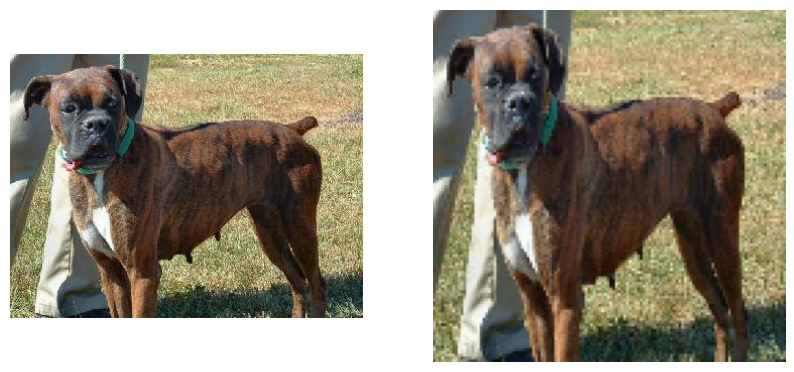

In [22]:
plt.figure(figsize=(10, 10))

# Plot normal picture
ax = plt.subplot(1, 2, 1)
for image, label in cats_vs_dogs.take(1):
    plt.imshow(image.numpy())
    plt.axis('off')
    plt.plot()
    
# Plot resized picture
size = (128, 128)
resized_cvd = cats_vs_dogs.map(lambda x, y: (tf.image.resize(x, size), y))
ax = plt.subplot(1, 2, 2)
for image, label in resized_cvd.take(1):
    plt.imshow(image.numpy().astype("int32"))
    plt.axis('off')
    plt.plot()

### Create a pre-processing pipeline

A preprocessing pipeline is a sequence of data transformation steps applied to input data before feeding it into a machine learning model. In the context of image processing for convolutional neural networks (CNNs), a preprocessing pipeline typically includes a series of operations aimed at preparing image data for training or inference. Here's how a preprocessing pipeline might look for image data:

1. **Loading**: The pipeline begins with loading the image data from a data source, such as files on disk or a database.

2. **Resizing**: Images are resized to a fixed size to ensure uniformity in input dimensions across the dataset. This step is crucial for CNNs, as they typically require inputs of consistent dimensions.

3. **Normalization**: Pixel values are scaled to a predefined range, such as [0, 1] or [-1, 1], to ensure numerical stability and facilitate convergence during training.

4. **Data Augmentation**: Variations of the input data are generated by applying transformations like rotation, flipping, cropping, and brightness adjustments. Data augmentation helps improve model generalization and robustness by exposing it to a diverse set of examples.

5. **Color Space Conversion**: Depending on the task and the characteristics of the dataset, images may be converted to different color spaces (e.g., grayscale, RGB, HSV) to extract relevant features or reduce computational complexity.

6. **Noise Reduction**: Techniques like filtering or denoising may be applied to remove unwanted noise from images, enhancing the signal-to-noise ratio and improving feature extraction.

7. **Padding**: Images may be padded to ensure that spatial information near the borders is preserved during convolution operations, especially in deeper layers of the network.

8. **Channel Order**: The order of color channels in the image (e.g., RGB or BGR) may need to be adjusted to match the expectations of the CNN architecture being used.

9. **Pretrained Model Features Extraction**: For transfer learning, pretrained CNN models may be used to extract features from images. In this case, the preprocessing pipeline may involve resizing and normalization steps tailored to the requirements of the pretrained model.

10. **Data Balancing**: Ensuring a balanced distribution of classes in the dataset can prevent bias toward dominant classes and improve model performance on minority classes. This may involve techniques like oversampling, undersampling, or class-weighted loss functions.

Overall, a preprocessing pipeline ensures that the input data is properly formatted, normalized, and augmented to maximize the effectiveness of the CNN model during training or inference. It plays a crucial role in achieving optimal performance and generalization of the model.

Documentation of the pre-processing functions
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing

Image data augmentation: These layers apply random augmentation transforms to a batch of images. They are only active during training.

In [23]:
# Define data augemtation
resized_cvd = cats_vs_dogs.map(lambda x, y: (tf.image.resize(x, size), y))

dog_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2, 0.2),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
    ]
)

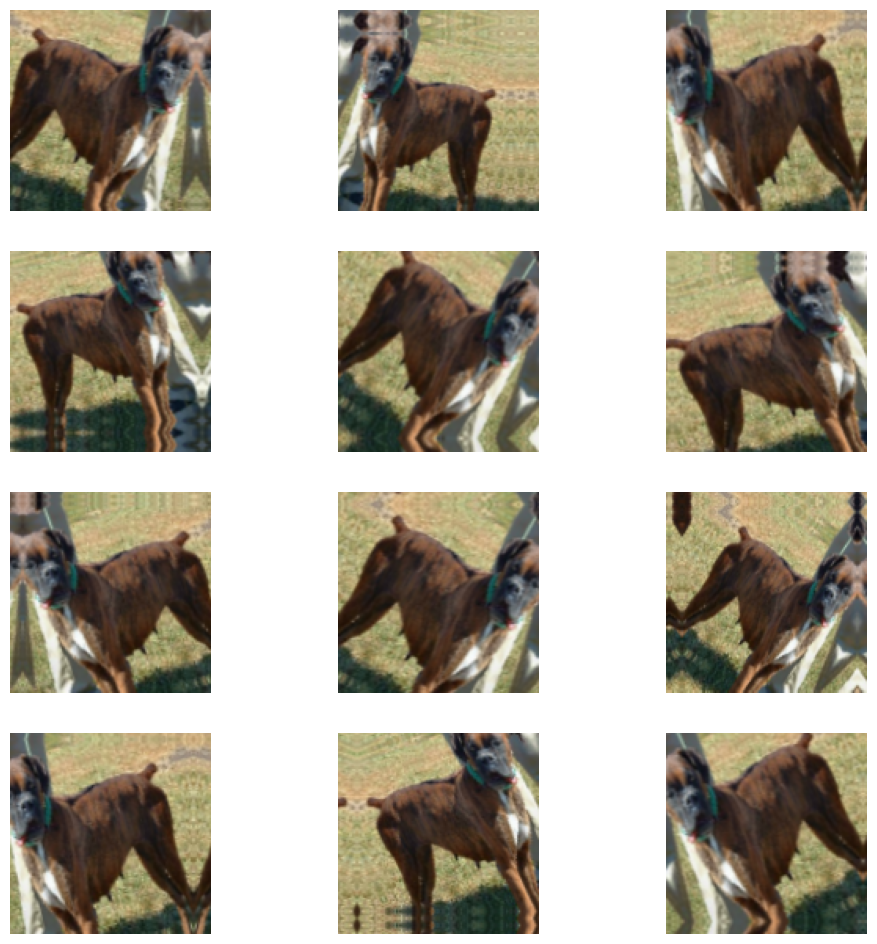

In [24]:
for images, labels in resized_cvd.take(1):
    plt.figure(figsize=(12, 12))
    first_image = images
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        augmented_image = dog_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")

In [25]:
mnist_aug = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.5),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1, 0.1),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
    ]
)

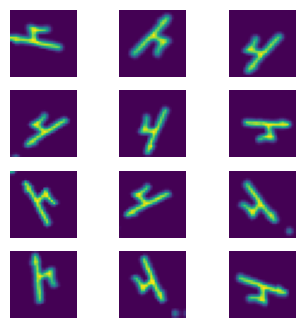

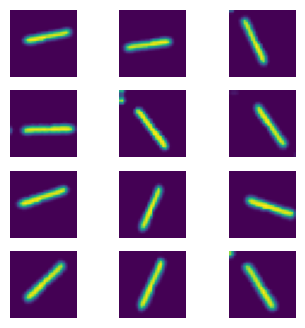

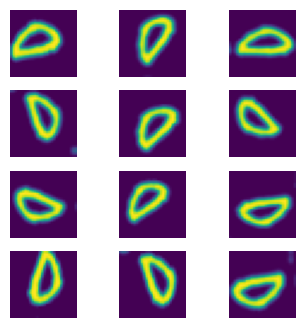

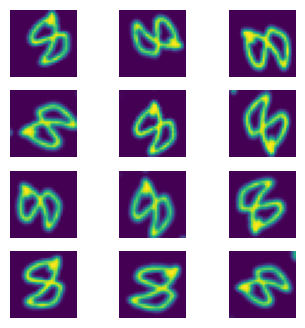

In [26]:
train_ds = mnist_train.cache().batch(5).prefetch(buffer_size=10)
#cache() - memory on disk
# batch(5) - into group of 5 examples
#This method prefetches batches of data from the dataset into memory, 
#overlapping the data preprocessing and model execution. 
#Specifying a buffer_size of 10 means that TensorFlow will 
#prefetch up to 10 batches of data, helping to keep the GPU or CPU utilized efficiently during training.

for images, labels in train_ds.take(1):
    for first_image in images[0:5]:
        plt.figure(figsize=(4, 4))
        for i in range(12):
            ax = plt.subplot(4, 3, i + 1)
            augmented_image = mnist_aug(
                tf.expand_dims(first_image, 0), training=True
            )
            plt.imshow(augmented_image[0].numpy().astype("int32"))
            plt.axis("off")
        plt.show()

# Training CNNs

A tutorial dedicated to CNNs and images:
 - https://www.tensorflow.org/tutorials/images/cnn

## Mnist
Low resolution images

### Simple CNN
 - With sequential API
 - Two blocks of convolutions with max pooling and a fully connected layer

A fully connected layer, also known as a dense layer, is a type of neural network layer where each neuron is connected to every neuron in the previous layer. In other words, all the neurons in the previous layer are connected to every neuron in the fully connected layer. 

In a convolutional neural network (CNN), fully connected layers are typically used at the end of the network, after one or more blocks of convolutional and pooling layers. These fully connected layers are responsible for learning high-level features and making predictions based on the features extracted by the convolutional layers.

Mathematically, the output of a fully connected layer is computed using the dot product of the input vector (or matrix) and a weight matrix, followed by an activation function. The output of a fully connected layer is then passed on to the next layer in the network.

Fully connected layers are often used in classification tasks, where the output of the network corresponds to the probability of each class in the classification problem.

In [29]:
# Define the architecture:

model = tf.keras.models.Sequential()

# First convolution block
model.add(tf.keras.layers.Conv2D(filters=16, #number of filters
                                 kernel_size=(3, 3), # size of one filter
                                 strides=1, #number of pixel by which is it moving
                                 padding='same', # Padding is used to ensure that the spatial dimensions of the input and output feature maps are the same. When set to 'same', zero-padding is added to the input data if necessary to achieve this.
                                 activation='relu', #activation function
                                 input_shape=(28, 28, 1))) #!!!!
#Kernel/filter -> feautre map + applied Relu -> ready for may pooling

model.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')) # 3x3 pooling window
#max pooling

# Second convolution block
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3, 3),
                                 strides=1,
                                 padding='same',
                                 activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same'))

# Hidden layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)               

Sure, let's break down each part of the architecture step by step, both in theoretical terms and with some math:

1. **Convolutional Layers**:
   - **Theory**: Convolutional layers are the building blocks of convolutional neural networks (CNNs). They are designed to automatically and adaptively learn spatial hierarchies of features from the input data. Each convolutional layer applies a set of filters to the input, where each filter extracts different features from the input.
   - **Math**: The convolution operation involves sliding a filter (also known as a kernel) over the input data and computing the dot product between the filter and the input at each position. This operation produces a feature map, which represents the presence of specific patterns or features in the input data.
  
2. **Max Pooling Layers**:
   - **Theory**: Max pooling layers are used to reduce the spatial dimensions of the feature maps produced by the convolutional layers, while retaining the most important information. Max pooling achieves this by partitioning the input feature map into non-overlapping rectangles and outputting the maximum value from each sub-region.
   - **Math**: Max pooling involves selecting the maximum value from each sub-region of the input feature map. This reduces the spatial dimensions of the feature map by a factor determined by the size of the pooling window and the stride.

3. **Flatten Layer**:
   - **Theory**: The flatten layer is used to convert the multidimensional feature maps produced by the convolutional and pooling layers into a one-dimensional vector, which can be fed into the fully connected (dense) layers of the network.
   - **Math**: The flatten layer reshapes the input tensor into a vector without modifying its contents. For example, if the input tensor has dimensions (batch_size, height, width, channels), the flatten layer will reshape it into a vector of length (batch_size * height * width * channels).

4. **Fully Connected (Dense) Layer**:
   - **Theory**: Fully connected layers are standard neural network layers where each neuron is connected to every neuron in the previous layer. These layers are typically used at the end of the network to perform high-level reasoning and make predictions based on the features extracted by the earlier layers.
   - **Math**: The output of a fully connected layer is computed using the dot product between the input vector and a weight matrix, followed by an activation function. Mathematically, if the input vector has dimension \(n\) and the fully connected layer has \(m\) neurons, the output is calculated as \(\text{output} = \text{activation}(\text{input} \times \text{weights} + \text{bias})\), where \(\text{weights}\) is an \(n \times m\) weight matrix and \(\text{bias}\) is a vector of length \(m\). The activation function introduces non-linearity into the network.

In summary, the architecture you provided consists of two convolutional blocks followed by a fully connected layer. The convolutional layers extract features from the input images, the max pooling layers reduce the spatial dimensions, and the fully connected layer performs high-level reasoning and makes predictions.

In [ ]:
7*7*32

In [30]:
# TODO: To make the following line work you need to install graphviz (if you have not done so in one of the previous classes)
# 1) follow the instructions https://graphviz.gitlab.io/download/?fbclid=IwAR1V-lrRhho5rSfBVYXYISsighqRwOCOgMHLmL_DclkQrPtMXQaKj3mFcqs
# 2) this notebook has been tested with version 8.0.3
# 3) make sure you add it to the PATH variable (you are specifically asked during the installation) at least for local user

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#1 for grayscale

In [31]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [32]:
# Load the mnist data
mnist_train, mnist_dev = tfds.load(
    "mnist",
    split=["train", "test"],
    as_supervised=True, # Include labels
    shuffle_files=False # Change to true for training
)

In [36]:
# Create batches from the dataset
batch_size = 128

train_ds = mnist_train.cache().batch(batch_size).prefetch(buffer_size=10)
##train_ds = mnist_train.cache().batch(batch_size).prefetch(buffer_size=10).map(lambda x,y: (mnist_aug(x), y))
validation_ds = mnist_dev.cache().batch(batch_size).prefetch(buffer_size=10)

#train_ds = mnist_train.batch(batch_size)
#validation_ds = mnist_dev.batch(batch_size)

Note on what should be the numbers that we see during the training: "For training loss, keras does a running average over the batches. For validation loss, a conventional average over all the batches in validation data is performed. The training accuracy is the average of the accuracy values for each batch of training data during training."

In [37]:
epochs = 3

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/mnist_simple')

model.fit(train_ds,
          epochs=epochs,
          validation_data=validation_ds)

Epoch 1/3
469/469 [==============================] - 17s 37ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.1129 - val_sparse_categorical_accuracy: 0.9743
Epoch 2/3
469/469 [==============================] - 18s 38ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0973 - val_sparse_categorical_accuracy: 0.9772
Epoch 3/3
469/469 [==============================] - 18s 39ms/step - loss: 0.0465 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.0848 - val_sparse_categorical_accuracy: 0.9799


Epoch 1/3
469/469 [==============================] - 18s 38ms/step - loss: 1.8576 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.2111 - val_sparse_categorical_accuracy: 0.9606
Epoch 2/3
469/469 [==============================] - 17s 36ms/step - loss: 0.1702 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.1309 - val_sparse_categorical_accuracy: 0.9712
Epoch 3/3
469/469 [==============================] - 18s 37ms/step - loss: 0.1052 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.1216 - val_sparse_categorical_accuracy: 0.9711
<keras.callbacks.History at 0x1b530057220>

In [38]:
# if we want to get prediction manually
prediction = model.predict(validation_ds)

In [39]:
# we have softmax actiovation, so we get 10 probabilities
prediction.shape

(10000, 10)

In [40]:
# we probably want to select the label with the highest predicted probability as our prediction
np.argmax(prediction, axis=1)

array([2, 0, 4, ..., 8, 0, 5], dtype=int64)

### Bigger CNN with regularization
 - With functional API
 - Increase number of convolution layers and channels
 - Uses label smoothing, dropout, L2, early stopping

In [41]:
# Label smoothing

def label_smooth_train(image, labels, alpha, n_labels):
    labels = tf.one_hot(tf.cast(labels, tf.int32), n_labels)
    labels = tf.cast(labels, tf.float32)
    labels *= (1 - alpha)
    labels += alpha / n_labels
    return image, labels

def label_smooth_dev(image, labels, n_labels):
    labels = tf.one_hot(tf.cast(labels, tf.int32), n_labels)
    labels = tf.cast(labels, tf.float32)
    return image, labels

In [42]:
# Create a bigger CNN
reg = tf.keras.regularizers.L1L2(l2=0.001)

inputs = tf.keras.layers.Input(shape=[28, 28, 1])

# Augment data - creates distortion in the evaluation data as well (not good for well centered mnist)
# x = mnist_aug(inputs)

# First convolution block
x = tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3, 3),
                                 strides=1,
                                 padding='same',
                                 activation='relu',
                                 kernel_regularizer=reg)(inputs)

x = tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3, 3),
                                 strides=1,
                                 padding='same',
                                 activation='relu',
                                 kernel_regularizer=reg)(x)

x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

# Second convolution block
x = tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3, 3),
                                 strides=1,
                                 padding='same',
                                 kernel_regularizer=reg,
                                 activation='relu')(x)

x = tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 strides=1,
                                 padding='same',
                                 kernel_regularizer=reg,
                                 activation='relu')(x)

x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

# Hidden layer
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                             

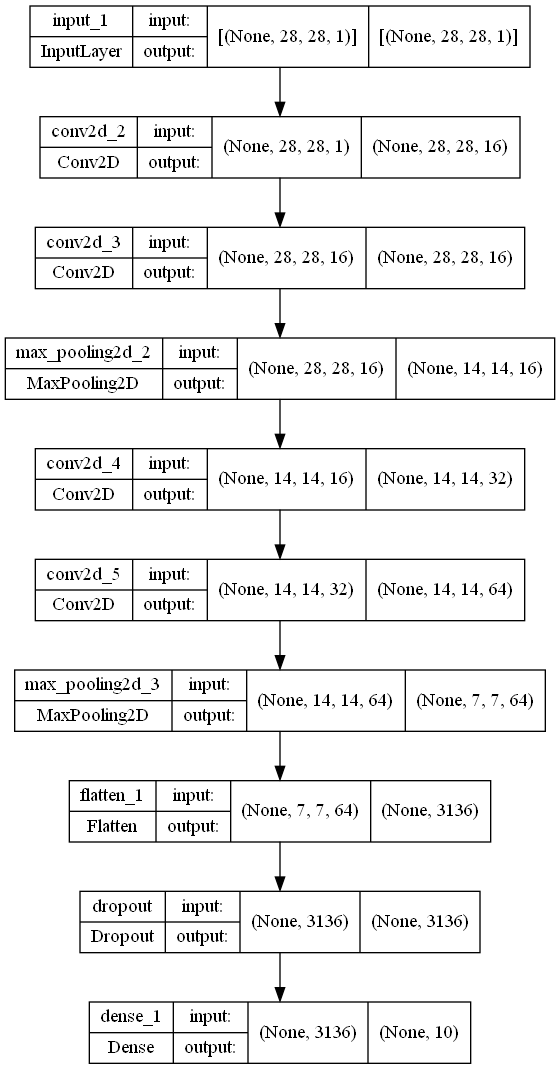

In [43]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [45]:
# Create batches with label smoothing
batch_size = 128
smooth_alpha = 0.05 #epsilon nudge
n_labels = 10 #čísla 0-9

train_ds = mnist_train.map(lambda x, y: label_smooth_train(x, y, smooth_alpha, n_labels))
validation_ds = mnist_dev.map(lambda x, y: label_smooth_dev(x, y, n_labels))

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [46]:
# Compile the model - label smoothing -> no sparse loss and metric (we also have one hot encoding)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy()
)

In [47]:
epochs = 1

early_call = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy', patience=3, restore_best_weights=True
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/mnist_regularized')

model.fit(train_ds,
          epochs=epochs,
          validation_data=validation_ds,
          callbacks=[early_call])

469/469 [==============================] - 61s 127ms/step - loss: 0.9001 - categorical_accuracy: 0.8937 - val_loss: 0.1921 - val_categorical_accuracy: 0.9813


## Cats vs dogs
Higher resolution images

### Deeper network with regularization
 - Uses data_augmentation, label smoothing, dropout, L2, early stopping, batch normalization, global pooling at the end
 - Functional API used
 
Batch norm layer has training and inference mode, and has also trainable and non-trainable params, see https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization

In [48]:
reg = tf.keras.regularizers.L1L2(l2=0.0001) #small penalty to the weights

inputs = tf.keras.layers.Input(shape=[128, 128, 3])

# Apply data augemtantion
x = dog_augmentation(inputs)

# First convolution block (64 x 64)
x = tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3,
                           strides=2,
                           padding='same',
                           kernel_regularizer=reg)(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

# Second convolution block (32 x 32)
x = tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           strides=1,
                           padding='same',
                           kernel_regularizer=reg)(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

# Third convolution block (16 x 16)
x = tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           strides=1,
                           padding='same',
                           kernel_regularizer=reg)(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

# Fourth convolution block (8 x 8)
x = tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           strides=1,
                           padding='same',
                           kernel_regularizer=reg)(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)

# Apply global average pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#Until here I can use ImageNett no?

# Dropout and fully connected
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(inputs, outputs)

# There are some non-trainable parameters
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                       

L1 Regularization (Lasso Regularization):

Adds a penalty equal to the absolute value of the magnitude of the coefficients.
Encourages sparsity, meaning it can drive some weights to exactly zero, effectively performing feature selection.


L2 Regularization (Ridge Regularization):

Adds a penalty equal to the square of the magnitude of the coefficients.
Encourages smaller weights but does not drive them to zero.
Helps to spread the error among all weights, making the model more robust.

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [52]:
# Create train and validation data and batches
train_size = 10000
valid_size = 2000
batch_size = 128
image_size = (128, 128)

train_ds = cats_vs_dogs.take(train_size)
rest = cats_vs_dogs.skip(train_size)
validation_ds = rest.take(valid_size)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, image_size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, image_size), y))

# Could also apply label smoothing
# smooth_alpha = 0.01
# n_labels = 2
# train_ds = train_ds.map(lambda x, y: label_smooth_train(x, y, smooth_alpha, n_labels))
# validation_ds = validation_ds.map(lambda x, y: label_smooth_dev(x, y, n_labels))

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [51]:
# Compile the model - label smoothing -> no sparse loss and metric
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=tf.keras.metrics.BinaryAccuracy()
)

In [53]:
epochs = 1

early_call = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy', patience=3, restore_best_weights=True
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/cats_vs_dogs')

model.fit(train_ds,
          epochs=epochs,
          validation_data=validation_ds,
          callbacks=[early_call])

79/79 [==============================] - 62s 760ms/step - loss: 0.6445 - binary_accuracy: 0.6486 - val_loss: 0.6390 - val_binary_accuracy: 0.6190


The choice between using the **softmax** and **sigmoid** activation functions typically depends on the nature of the classification problem you are dealing with. Here are the guidelines:

### Sigmoid Activation Function
- **Usage**: Binary classification or multi-label classification.
- **Output**: Produces a probability value between 0 and 1 for each output node.
- **Application**:
  - **Binary Classification**: When you have only two classes (e.g., spam vs. not spam), the sigmoid activation function is used in the output layer. The output can be interpreted as the probability of the positive class.
  - **Multi-label Classification**: When each class is independent of the others, and multiple classes can be true simultaneously (e.g., tagging multiple objects in an image). Each output node uses a sigmoid function, providing a probability for each class independently.

```python
# Example for Binary Classification
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

### Softmax Activation Function
- **Usage**: Multi-class classification.
- **Output**: Produces a probability distribution over mutually exclusive class labels (all probabilities sum to 1).
- **Application**:
  - **Multi-class Classification**: When you have more than two classes, and each input is assigned to exactly one class (e.g., digit classification where each digit from 0 to 9 is a distinct class). The softmax function is applied to the output layer, and it converts the raw output scores into probabilities that sum up to 1.

```python
# Example for Multi-class Classification
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

### Summary of Differences
- **Sigmoid**:
  - **Output**: Single value between 0 and 1 per node.
  - **Use Case**: Binary classification or multi-label classification.
  - **Loss Function**: Typically used with `binary_crossentropy` for binary classification.
- **Softmax**:
  - **Output**: Probability distribution across all classes.
  - **Use Case**: Multi-class classification with mutually exclusive classes.
  - **Loss Function**: Typically used with `categorical_crossentropy` or `sparse_categorical_crossentropy`.

### Examples of When to Use Each

#### Binary Classification with Sigmoid
Imagine you are building a model to detect if an email is spam or not:

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

#### Multi-class Classification with Softmax
Imagine you are building a model to classify handwritten digits (0-9):

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

By selecting the appropriate activation function and corresponding loss function, you can effectively model and solve your specific classification problem.

<span style="color:red">**TO DO:** CIFAR 10</span>

Try to build you own convolutional network on CIFAR 10 dataset using residual connection and other features from the presented CNNs

see https://www.tensorflow.org/guide/keras/functional#a_toy_resnet_model - includes example with loading the cifar10 dataset and the usage of functional api for the residual connection

Optionally, you can add the data augmentation at the beginning of the network

A residual connection (or skip connection) is a technique used in neural networks, particularly in deep networks, to help mitigate the problem of vanishing gradients and to improve training efficiency. This technique was popularized by the introduction of Residual Networks (ResNets) by He et al. in their 2015 paper "Deep Residual Learning for Image Recognition".

In [ ]:
#CIFAR 10